In [ ]:
!openmc --plot


/storage/work/vai5027/.conda/envs/openmc-env1/lib/python3.11/site-packages/openmc/model/funcs.py:124: FutureWarning: The hexagonal_prism(...) function has been replaced by the HexagonalPrism(...) class. Future versions of OpenMC will not accept hexagonal_prism.
  warn("The hexagonal_prism(...) function has been replaced by the "


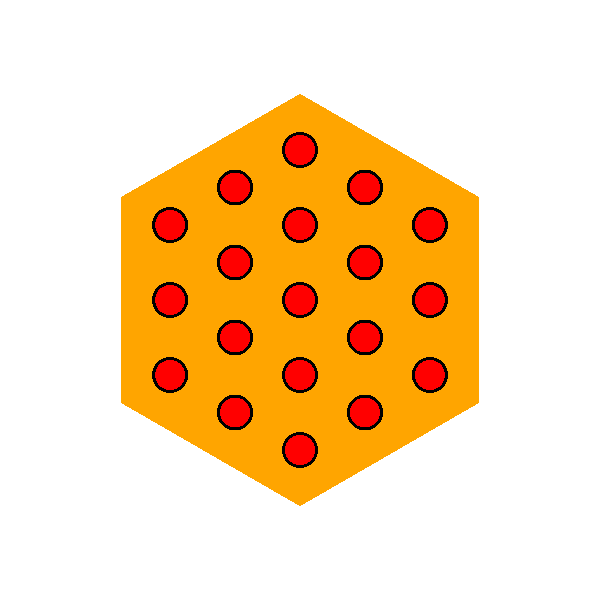

In [28]:
%matplotlib inline 
import numpy as np 
import os 
import math 
import openmc 
os.environ["OPENMC_CROSS_SECTIONS"] = "/storage/home/vai5027/work/NUCE403/endfb-viii/cross_sections.xml"


fuel = openmc.Material(name='uo2') 
fuel.add_nuclide('U235', 0.05) 
fuel.add_nuclide('U238', 0.95) 
fuel.add_nuclide('O16', 2) 
fuel.set_density('g/cm3', 11.5) 
fuel.volume = 19 * math.pi * 0.25 ** 2

cladding = openmc.Material(name='zircaloy4') 
cladding.add_element('Zr',0.98) 
cladding.add_element('Sn',0.015) 
cladding.add_element('Fe',0.002) 
cladding.add_element('Cr',0.001) 
cladding.add_element('O',0.001) 
cladding.add_element('Hf', 0.001) 
cladding.set_density('g/cm3',6.34) 

water = openmc.Material(name='h2o') 
water.add_nuclide('H1', 2.0) 
water.add_nuclide('O16', 1.0) 
water.set_density('g/cm3', 1.0) 
water.add_s_alpha_beta('c_H_in_H2O')

mats = openmc.Materials([fuel, cladding, water]) 
mats.export_to_xml() 
                 
cyl_uo2 = openmc.ZCylinder(r=0.25)
cyl_clad = openmc.ZCylinder(r=0.30)
z_max = openmc.ZPlane(z0=100, boundary_type='reflective')
z_min = openmc.ZPlane(z0=-100, boundary_type='reflective')

uo2_region = -cyl_uo2 & -z_max & +z_min
clad_region = +cyl_uo2 & -cyl_clad & -z_max & +z_min

uo2_cell = openmc.Cell(name='fuel')
uo2_cell.region = uo2_region
uo2_cell.fill = fuel

clad_cell = openmc.Cell(name='cladding')
clad_cell.region = clad_region
clad_cell.fill = cladding

water_cell = openmc.Cell(name='water')
water_cell.region = +cyl_clad & -z_max & +z_min
water_cell.fill = water

fuel_universe = openmc.Universe(cells=[uo2_cell, clad_cell, water_cell])
outer_universe = openmc.Universe(cells=[openmc.Cell(fill=water)])

lat = openmc.HexLattice()
lat.center = (0., 0.)
lat.pitch = (1.25,)
lat.outer = outer_universe

outer_ring = [fuel_universe] * 12
middle_ring = [fuel_universe] * 6
inner_ring = [fuel_universe]
lat.universes = [outer_ring, middle_ring, inner_ring]


outer_boundary = openmc.model.hexagonal_prism(edge_length=2.75 * lat.pitch[0], orientation='y', boundary_type='reflective')
main_cell = openmc.Cell(fill=lat, region=outer_boundary & -z_max & +z_min)

geom = openmc.Geometry([main_cell])
geom.export_to_xml()

# --- Create plot ---
p = openmc.Plot()
p.basis = 'xy'
p.origin = (0, 0, 0)
p.width = (10, 10)
p.pixels = (600, 600)        # Optional but recommended
p.color_by = 'material'

p.colors = {
    water: 'orange',
    fuel: 'red',
    cladding: 'black'
}

# --- Export plot file ---
openmc.Plots([p]).export_to_xml()

# --- Generate image ---
p.to_ipython_image()



In [ ]:
settings = openmc.Settings()
settings.batches = 100
settings.inactive = 10
settings.particles = 1000
settings.run_mode = 'eigenvalue'
settings.export_to_xml()

In [45]:
 # Depletion Cell
import openmc.deplete
fuel.volume = 19 * math.pi * 0.25 ** 2
chain = openmc.deplete.Chain.from_xml("./chain_simple.xml")
model = openmc.Model(geometry=geom, settings=settings)
operator = openmc.deplete.CoupledOperator(model, "./chain_simple.xml")
power = 1000 # Idk what these units are
time_steps = [30] * 6 # test only
integrator = openmc.deplete.PredictorIntegrator(operator, time_steps, power, timestep_units='d') # also better options available
integrator.integrate()


                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

 Reading H1 from /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/H1.h5
 Reading c_H_in_H2O from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/c_H_in_H2O.h5
 Minimum neutron data temperature: 0 K
 Maximum neutron data temperature: 1.7976931348623157e+308 K
 Preparing distributed cell instances...
 Reading plot XML file...
 Writing summary.h5 file...
[openmc.deplete] t=0.0 s, dt=2592000 s, source=1000
 Reading Ba135 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Ba135.h5
 Reading Ba136 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Ba136.h5
 Reading Ba138 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Ba138.h5
 Reading I134 from /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/I134.h5
 Reading I135 from /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/I135.h5
 Reading Xe135 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Xe135.h5
 Reading Xe134 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Xe134.h5


          1200K
          2500K


 Reading Gd157 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Gd157.h5
 Reading Cs137 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Cs137.h5
 Reading Ba137 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Ba137.h5
 Reading Gd156 from
 /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/Gd156.h5
 Reading U234 from /storage/home/vai5027/work/NUCE403/endfb-viii/neutron/U234.h5
 Maximum neutron transport energy: 20000000 eV for Hf174
 Initializing source particles...

 ====================>     K EIGENVALUE SIMULATION     <====================

  Bat./Gen.      k            Average k
  =========   ========   ====================
        1/1    1.47835
        2/1    1.56842
        3/1    1.42490
        4/1    1.58425
        5/1    1.55602
        6/1    1.57622
        7/1    1.58088
        8/1    1.44177
        9/1    1.41952
       10/1    1.37840
       11/1    1.40373
       12/1    1.39436    1.39904 +/- 0.00468
       13/1    1.48530    1.

       41/1    1.49559    1.44163 +/- 0.00950
       42/1    1.37328    1.43949 +/- 0.00945
       43/1    1.41275    1.43868 +/- 0.00919
       44/1    1.47271    1.43968 +/- 0.00897
       45/1    1.55920    1.44310 +/- 0.00936
       46/1    1.43162    1.44278 +/- 0.00910
       47/1    1.42505    1.44230 +/- 0.00886
       48/1    1.50684    1.44400 +/- 0.00879
       49/1    1.47795    1.44487 +/- 0.00861
       50/1    1.38139    1.44328 +/- 0.00854
       51/1    1.41240    1.44253 +/- 0.00836
       52/1    1.43148    1.44226 +/- 0.00817
       53/1    1.47205    1.44296 +/- 0.00800
       54/1    1.43940    1.44288 +/- 0.00782
       55/1    1.43111    1.44261 +/- 0.00765
       56/1    1.42322    1.44219 +/- 0.00749
       57/1    1.45590    1.44248 +/- 0.00734
       58/1    1.43502    1.44233 +/- 0.00718
       59/1    1.43042    1.44209 +/- 0.00704
       60/1    1.38802    1.44100 +/- 0.00698
       61/1    1.44574    1.44110 +/- 0.00684
       62/1    1.37682    1.43986 

       89/1    1.55206    1.43223 +/- 0.00500
       90/1    1.39089    1.43171 +/- 0.00496
       91/1    1.43121    1.43170 +/- 0.00490
       92/1    1.55736    1.43324 +/- 0.00508
       93/1    1.43467    1.43325 +/- 0.00502
       94/1    1.39011    1.43274 +/- 0.00498
       95/1    1.48314    1.43333 +/- 0.00496
       96/1    1.42112    1.43319 +/- 0.00490
       97/1    1.40602    1.43288 +/- 0.00486
       98/1    1.53768    1.43407 +/- 0.00495
       99/1    1.45008    1.43425 +/- 0.00489
      100/1    1.42760    1.43417 +/- 0.00484
 Creating state point statepoint.100.h5...

 =======================>     TIMING STATISTICS     <=======================

 Total time for initialization     = 0.0000e+00 seconds
   Reading cross sections          = 0.0000e+00 seconds
 Total time in simulation          = 1.2029e+01 seconds
   Time in transport only          = 1.1187e+01 seconds
   Time in inactive batches        = 9.2616e-01 seconds
   Time in active batches          = 1.1103e+0

        2/1    1.51705
        3/1    1.42630
        4/1    1.42552
        5/1    1.37562
        6/1    1.38874
        7/1    1.37980
        8/1    1.47766
        9/1    1.44005
       10/1    1.44555
       11/1    1.40952
       12/1    1.34573    1.37762 +/- 0.03190
       13/1    1.35898    1.37141 +/- 0.01944
       14/1    1.40887    1.38078 +/- 0.01663
       15/1    1.44237    1.39309 +/- 0.01782
       16/1    1.37669    1.39036 +/- 0.01481
       17/1    1.44214    1.39776 +/- 0.01454
       18/1    1.38787    1.39652 +/- 0.01265
       19/1    1.33854    1.39008 +/- 0.01288
       20/1    1.37740    1.38881 +/- 0.01159
       21/1    1.43030    1.39258 +/- 0.01114
       22/1    1.45359    1.39767 +/- 0.01137
       23/1    1.40225    1.39802 +/- 0.01047
       24/1    1.39834    1.39804 +/- 0.00969
       25/1    1.46145    1.40227 +/- 0.00996
       26/1    1.42456    1.40366 +/- 0.00942
       27/1    1.41879    1.40455 +/- 0.00890
       28/1    1.44896    1.40702 

       55/1    1.40863    1.41219 +/- 0.00842
       56/1    1.39272    1.41177 +/- 0.00825
       57/1    1.39036    1.41131 +/- 0.00808
       58/1    1.49082    1.41297 +/- 0.00809
       59/1    1.44890    1.41370 +/- 0.00795
       60/1    1.41534    1.41374 +/- 0.00779
       61/1    1.37533    1.41298 +/- 0.00767
       62/1    1.32226    1.41124 +/- 0.00773
       63/1    1.36582    1.41038 +/- 0.00763
       64/1    1.53660    1.41272 +/- 0.00784
       65/1    1.37929    1.41211 +/- 0.00772
       66/1    1.39478    1.41180 +/- 0.00759
       67/1    1.32499    1.41028 +/- 0.00761
       68/1    1.40617    1.41021 +/- 0.00748
       69/1    1.41205    1.41024 +/- 0.00735
       70/1    1.43820    1.41071 +/- 0.00724
       71/1    1.33342    1.40944 +/- 0.00723
       72/1    1.40246    1.40933 +/- 0.00711
       73/1    1.37165    1.40873 +/- 0.00703
       74/1    1.39294    1.40848 +/- 0.00692
       75/1    1.36410    1.40780 +/- 0.00685
       76/1    1.53308    1.40970 

In [46]:
# Post Processing 

!ls *.h5


depletion_results.h5	 openmc_simulation_n3.h5  statepoint.100.h5
openmc_simulation_n0.h5  openmc_simulation_n4.h5  summary.h5
openmc_simulation_n1.h5  openmc_simulation_n5.h5
openmc_simulation_n2.h5  openmc_simulation_n6.h5


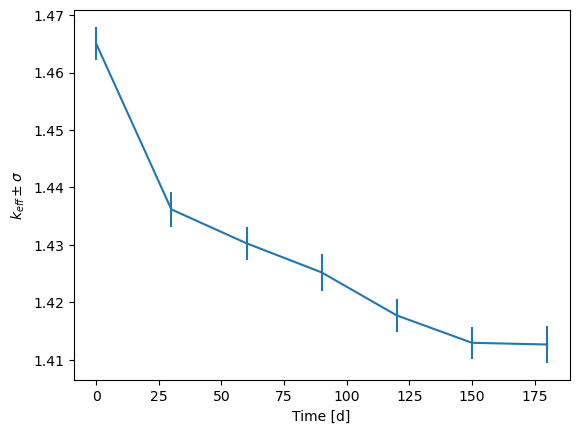

In [47]:
results = openmc.deplete.Results("./depletion_results.h5")
time, k = results.get_keff()
time /= (24 * 60 * 60)  # convert back to days from seconds
from matplotlib import pyplot
pyplot.errorbar(time, k[:, 0], yerr=k[:, 1])
pyplot.xlabel("Time [d]")
pyplot.ylabel("$k_{eff}\pm \sigma$");
